# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Overall observations:

1) Latidude has a high degree of impact on temperature, as it gets warmer the closer one is to 0 degrees (the equator).
2) Latidude does not have a high degree of impact, if any, on humidity, wind speed, or cloud cover.
3) No cities in the sampled data had humidity greater than 100%, which would be a fairly large red flag for data inaccuracies, as it is raining at 100% and therefore it cannot be more humid than that.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr


# Import API key
from Keyring import Weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
Output = "/DNI/Output/cities.csv"

# Range of latitudes and longitudes
LatRange = (-90, 90)
LongRange = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
Coord = []
Cities = []

# Create a set of random lat and lng combinations
Lat = np.random.uniform(LatRange[0], LatRange[1], size=1500)
Long = np.random.uniform(LongRange[0], LongRange[1], size=1500)
Coord = zip(Lat, Long)

# Identify nearest city for each lat, lng combination
for pin in Coord:
    city = citipy.nearest_city(pin[0], pin[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in Cities:
        Cities.append(city)

# Print the city count to confirm sufficient count
len(Cities)



651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Where am I going
BaseURL = "http://api.openweathermap.org/data/2.5/weather?"

# Where am I storing things
Temp = []
HMD = []
Cloud = []
Wind = []
Cit = []
Lat = []
Lon = []
Counter = 1


# Build query URL
for City in Cities:
        try:
            # Kickoff
            print("Beginning data retreval for record " + str(Counter) + ", "+ City.title() + ".")
            QueryURL = BaseURL + "appid=" + Weather + "&q=" + City + "&units=imperial"
            Data = requests.get(QueryURL).json()

            # Save all the things down
            Temp.append(Data['main']['temp_max'])
            HMD.append(Data['main']['humidity'])
            Cloud.append(Data['clouds']['all'])
            Wind.append(Data['wind']['speed'])
            Cit.append(City.title())
            Lat.append(Data['coord']['lat'])
            Lon.append(Data['coord']['lon'])
            
            # Done and on to the next
            print(City.title() + " has been processed.")
            Counter = Counter + 1
            
        except KeyError:
            print("There was an issue retreiving data for " + City.title())


Beginning data retreval for record 1, Buchanan.
Buchanan has been processed.
Beginning data retreval for record 2, Busselton.
Busselton has been processed.
Beginning data retreval for record 3, Ushuaia.
Ushuaia has been processed.
Beginning data retreval for record 4, Saint-Leu.
Saint-Leu has been processed.
Beginning data retreval for record 5, Derzhavinsk.
Derzhavinsk has been processed.
Beginning data retreval for record 6, Sao Filipe.
Sao Filipe has been processed.
Beginning data retreval for record 7, Soanierana Ivongo.
Soanierana Ivongo has been processed.
Beginning data retreval for record 8, Rikitea.
Rikitea has been processed.
Beginning data retreval for record 9, Avarua.
Avarua has been processed.
Beginning data retreval for record 10, Bredasdorp.
Bredasdorp has been processed.
Beginning data retreval for record 11, Groningen.
Groningen has been processed.
Beginning data retreval for record 12, Tugalan.
There was an issue retreiving data for Tugalan
Beginning data retreval fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Make it pretty and save it out
DataDict = {"City": Cit, "Lat": Lat, "Lon": Lon, "Temp": Temp, "HUM": HMD, "Cloud": Cloud, "Wind": Wind}
WeatherTable = pd.DataFrame(DataDict)
WeatherTable.to_csv("Output/CityData.csv", index = False)

WeatherTable



,City,Lat,Lon,Temp,HUM,Cloud,Wind
0,Buchanan,5.8808,-10.0467,78.80,94,40,12.21
1,Busselton,-33.6500,115.3333,55.00,96,6,3.11
2,Ushuaia,-54.8000,-68.3000,41.00,70,20,4.61
3,Saint-Leu,-21.1500,55.2833,75.20,69,0,8.05
4,Derzhavinsk,51.1000,66.3167,49.91,47,59,10.16
...,...,...,...,...,...,...,...
581,Huarmey,-10.0681,-78.1522,71.64,76,67,10.02
582,San Jose,37.3394,-121.8950,75.00,49,20,18.41
583,Toumodi,6.5613,-5.0158,84.00,78,20,4.61
584,Grand Gaube,-20.0064,57.6608,75.00,88,11,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----

Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# 100% humidity = rain so > 100% shouldn't even be possible but I'm willing to check

TooWet = WeatherTable.loc[WeatherTable['HUM'] > 100]
TooWet

,City,Lat,Lon,Temp,HUM,Cloud,Wind


In [6]:
#  Get the indices of cities that have humidity over 100%.

No cities have humidity above 100% so I will be moving on to the next section.

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

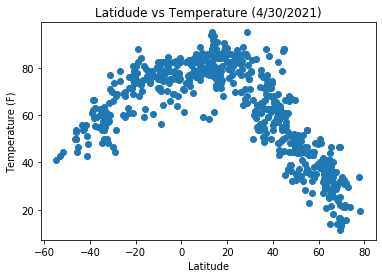

In [8]:
# Plot
y_values = WeatherTable["Temp"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

# Label
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.title("Latidude vs Temperature (4/30/2021)")

# Print
plt.savefig("Output/TempVsLat.png")

# Display
plt.show()

The chart is plotting maximum temperature versus latitude, and showing that in general, the furhter away from the equator (0 degrees latitude) the lower the max temperature.

## Latitude vs. Humidity Plot

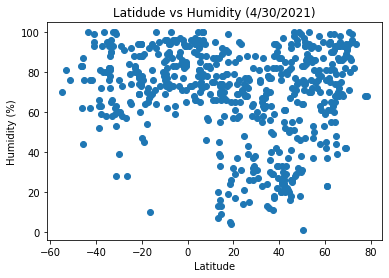

In [9]:
# Plot
y_values = WeatherTable["HUM"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

# Label
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("Latidude vs Humidity (4/30/2021)")

# Print
plt.savefig("Output/HumidVsLat.png")

# Display
plt.show()

The chart is plotting max percent humidity against latitude, and while there is not a high degree of correllation, it appears that very low humidity is only appearing in the lower half of the northern hemisphere.

## Latitude vs. Cloudiness Plot

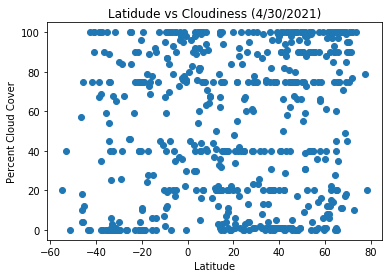

In [10]:
# Plot
y_values = WeatherTable["Cloud"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

# Label
plt.ylabel('Percent Cloud Cover')
plt.xlabel('Latitude')
plt.title("Latidude vs Cloudiness (4/30/2021)")

# Print
plt.savefig("Output/CloudVsLat.png")

# Display
plt.show()

The chart is plotting percent cloud cover versus latitude, and there does not appear to be much if any correlation between the two metrics.

## Latitude vs. Wind Speed Plot

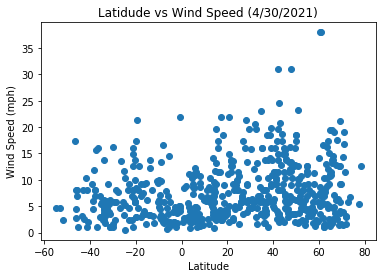

In [11]:
# Plot
y_values = WeatherTable["Wind"]
x_values = WeatherTable["Lat"]
plt.scatter(x_values,y_values)

#Label
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latidude vs Wind Speed (4/30/2021)")

# Print
plt.savefig("Output/WindVsLat.png")

#Display
plt.show()

The chart is plotting wind speed versus latitude, and showing that there does not appear to be a much correlation between the two metrics, but that wind speeds trend consistently low regardless of latitude.

## Linear Regression

In [12]:
# Limit data to Northern hemisphere
TopHalf = WeatherTable.loc[WeatherTable['Lat'] >= 0]

# Limit data to Southern hemisphere
BottomHalf = WeatherTable.loc[WeatherTable['Lat'] < 0]

print("Of " + str(len(WeatherTable)) + " cities " + str(len(TopHalf)) + " are in the northern hemisphere while the remaining " + str(len(BottomHalf)) + " are in the southern hemisphere.")

Of 586 cities 416 are in the northern hemisphere while the remaining 170 are in the southern hemisphere.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between temperature and latitude in the northern hemisphere is -0.88
The r-squared is: 0.77


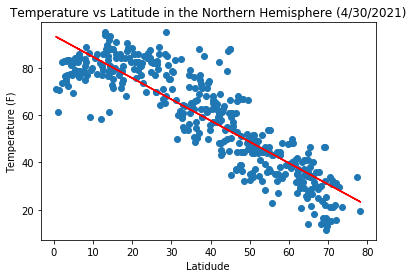

In [13]:
# Calculate the correlation value because why not
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["Temp"])
print(f"The correlation between temperature and latitude in the northern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = TopHalf["Lat"]
y_values = TopHalf["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Temperature (F)')
plt.title ("Temperature vs Latitude in the Northern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/NorthHemTempVsLat.png")

#Display
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between temperature and latitude in the southern hemisphere is 0.79
The r-squared is: 0.62


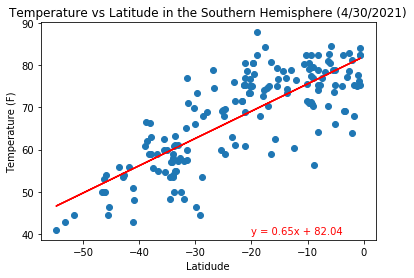

In [21]:
# Calculate the correlation value because why not
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["Temp"])
print(f"The correlation between temperature and latitude in the southern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = BottomHalf["Lat"]
y_values = BottomHalf["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Temperature (F)')
plt.title ("Temperature vs Latitude in the Southern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-20,40),fontsize=10,color="red")

# Print
plt.savefig("Output/SouthHemTempVsLat.png")

#Display
plt.show()

The linear regressions, with r^2 values of 0.77 and 0.62 show that latitude has a high correlation with temperature, as the further from the equater one moves the lower the max temperature gets.  This is also supported by high correlation values of -0.88 and 0.79.  The impact is more pronouced in the northern hemisphere, but that may simply be because the sample contains significantly more northern hemisphere cities, accounting for ~71% of the sample.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude in the northern hemisphere is 0.07
The r-squared is: 0.01


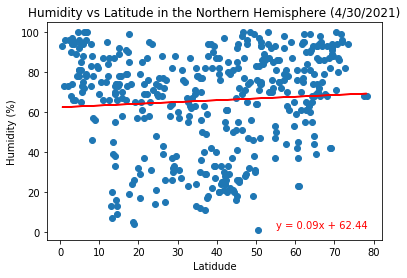

In [22]:
# Calculate the correlation value because why not
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["HUM"])
print(f"The correlation between humidity and latitude in the northern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = TopHalf["Lat"]
y_values = TopHalf["HUM"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title ("Humidity vs Latitude in the Northern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(55,2),fontsize=10,color="red")

# Print
plt.savefig("Output/NorthHemHumidVsLat.png")

#Display
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude in the southern hemisphere is 0.15
The r-squared is: 0.02


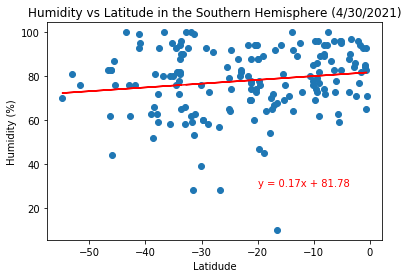

In [23]:
# Calculate the correlation value because why not
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["HUM"])
print(f"The correlation between humidity and latitude in the southern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = BottomHalf["Lat"]
y_values = BottomHalf["HUM"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title ("Humidity vs Latitude in the Southern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-20,30),fontsize=10,color="red")

# Print
plt.savefig("Output/SouthHemHumidVsLat.png")

#Display
plt.show()

The linear regressions show limited to no impact of latitude on humidity, with r^2 values of 0.01 and 0.02.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloud cover and latitude in the northern hemisphere is 0.12
The r-squared is: 0.01


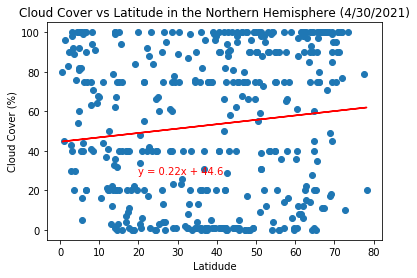

In [24]:
# Calculate the correlation value because why not
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["Cloud"])
print(f"The correlation between cloud cover and latitude in the northern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = TopHalf["Lat"]
y_values = TopHalf["Cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Cloud Cover (%)')
plt.title ("Cloud Cover vs Latitude in the Northern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(20,28),fontsize=10,color="red")

# Print
plt.savefig("Output/NorthHemCloudVsLat.png")

#Display
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloud cover and latitude in the southern hemisphere is 0.23
The r-squared is: 0.05


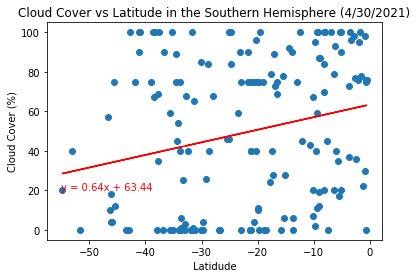

In [25]:
# Calculate the correlation value because why not
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["Cloud"])
print(f"The correlation between cloud cover and latitude in the southern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = BottomHalf["Lat"]
y_values = BottomHalf["Cloud"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Cloud Cover (%)')
plt.title ("Cloud Cover vs Latitude in the Southern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

# Print
plt.savefig("Output/SouthHemCloudVsLat.png")

#Display
plt.show()

With linear regression showing r^2 values of 0.01 and 0.05, we can safely assume that latitude has little to any impact on percent cloud cover.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude in the northern hemisphere is 0.13
The r-squared is: 0.02


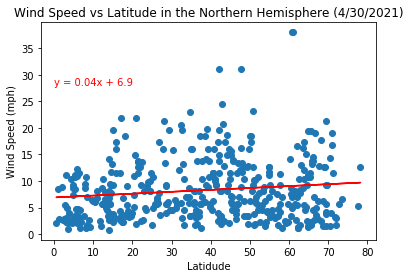

In [26]:
# Calculate the correlation value because why not
correlation = st.pearsonr(TopHalf["Lat"],TopHalf["Wind"])
print(f"The correlation between wind speed and latitude in the northern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = TopHalf["Lat"]
y_values = TopHalf["Wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Wind Speed (mph)')
plt.title ("Wind Speed vs Latitude in the Northern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,28),fontsize=10,color="red")

# Print
plt.savefig("Output/NorthHemWindidVsLat.png")

#Display
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between cloud cover and latitude in the southern hemisphere is -0.04
The r-squared is: 0.0


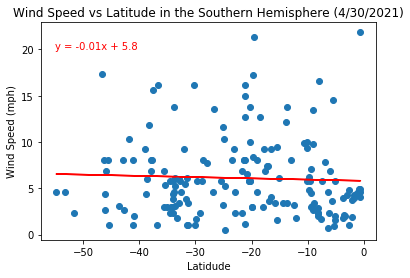

In [27]:
# Calculate the correlation value because why not
correlation = st.pearsonr(BottomHalf["Lat"],BottomHalf["Wind"])
print(f"The correlation between cloud cover and latitude in the southern hemisphere is {round(correlation[0],2)}")

# Plot
x_values = BottomHalf["Lat"]
y_values = BottomHalf["Wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('Latidude')
plt.ylabel('Wind Speed (mph)')
plt.title ("Wind Speed vs Latitude in the Southern Hemisphere (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

# Print
plt.savefig("Output/SouthHemWindVsLat.png")

#Display
plt.show()

The linear regressions, with r^2 values of 0.02 and 0.0 show that latitude is not a driver of wind speed.